# 1. Import Library

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Define Function

In [19]:
def LR_find_r(X, Y):
    Xmean = X.mean()
    Ymean = Y.mean()
    fraction = ((X - Xmean)*(Y - Ymean)).sum()
    denominator = np.sqrt(((X - Xmean)**2).sum()*((Y - Ymean)**2).sum())
    r = fraction/denominator
    return r

In [20]:
def LR_find_ab(X, Y):
    XY = X*Y
    X2 = X**2
    Xmean = X.mean()
    Ymean = Y.mean()
    XYmean = XY.mean()
    X2mean = X2.mean()
    denominator = X2mean - Xmean**2
    a = (XYmean - Xmean*Ymean)/denominator
    b = (X2mean*Ymean - Xmean*XYmean)/denominator
    return a, b

In [21]:
def LR_find_Yhat(X, a, b):
    Yhat = a*X + b
    return Yhat

In [26]:
def find_error(Y, Yhat, TypeOfError):
    if TypeOfError == 'SSE':
        error = find_SSE(Y, Yhat)
    elif TypeOfError == 'MSE':
        error = find_MSE(Y, Yhat)
    elif TypeOfError == 'MAE':
        error = find_MAE(Y, Yhat)
    elif TypeOfError == 'MAPE':
        error = find_MAPE(Y, Yhat)
    return error

In [28]:
def find_SSE(Y, Yhat):
    SSE = ((Y - Yhat)**2).sum()
    return SSE

In [30]:
def find_MSE(Y, Yhat):
    N = Y.shape[0]
    SSE = ((Y - Yhat)**2).sum()
    MSE = SSE/N
    return MSE

In [32]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [34]:
def find_MAPE(Y, Yhat):
    N = Y.shape[0]
    MAPE = np.abs((Y - Yhat)/Y).sum()*100/N
    return MAPE

# 3. Read data

In [37]:
Data = pd.read_csv('GB.csv')

In [39]:
Data

,Day,Bacteria
0,1.0,2.791933
1,1.2,2.534075
2,1.4,3.802597
3,1.6,2.096585
4,1.8,2.973395
5,2.0,3.630105
6,2.2,4.359298
7,2.4,4.294497
8,2.6,4.384797
9,2.8,5.816889


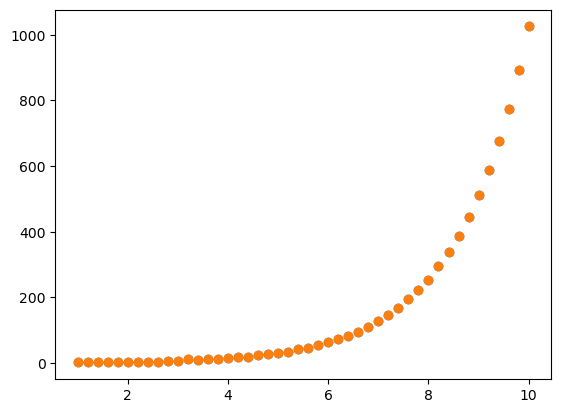

In [43]:
DataMatrix = Data.values
N = DataMatrix.shape[0]  #N = 46
X = DataMatrix[:, :1]
Y = DataMatrix[:, 1:]
plt.scatter(X, Y)
plt.show()

In [47]:
r = LR_find_r(X,Y)
r

0.8055876905536506

In [49]:
Y =np.log(Y)

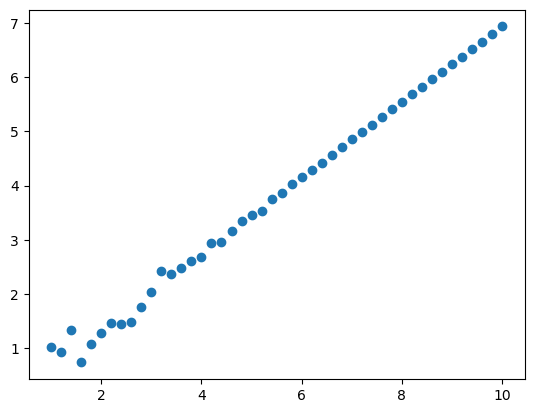

In [51]:
plt.scatter(X, Y)
plt.show()

In [53]:
r = LR_find_r(X,Y)
r

0.997914835868657

In [55]:
X_Train = X[:35]
Y_Train = Y[:35]
X_Test = X[35:]
Y_Test = Y[35:]


# 4. Create Model

In [57]:
a,b = LR_find_ab(X_Train,Y_Train)

In [59]:
a

0.6944850566074702

In [61]:
b

-0.02636464389744353

In [63]:
Yhat_Train = LR_find_Yhat(X_Train, a, b)

In [65]:
error_Train = find_error(Y_Train, Yhat_Train, 'MAPE')

In [67]:
error_Train

6.027487276119556

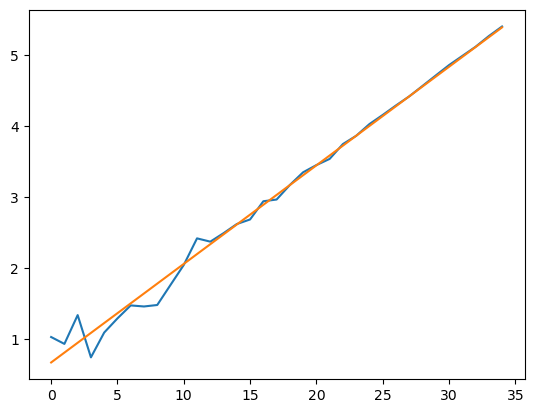

In [69]:
plt.plot(Y_Train, label = 'Real Train')
plt.plot(Yhat_Train, label = 'Predicted Train')
plt.show()


# 5. Make Prediction

In [71]:
Yhat_Test = LR_find_Yhat(X_Test, a, b)

In [73]:
error_Test = find_error(Y_Test, Yhat_Test, 'SSE')

In [75]:
error_Test

0.0021677931449546493

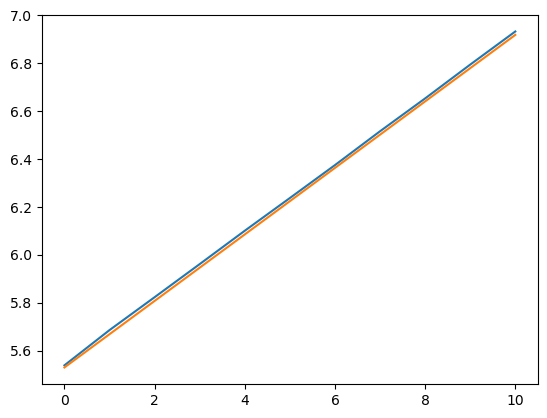

In [77]:
plt.plot(Y_Test, label = 'Real Test')
plt.plot(Yhat_Test, label = 'Predicted Test')
plt.show()


In [79]:
Y_Test = np.exp(Y_Test)
Yhat_Test = np.exp(Yhat_Test)


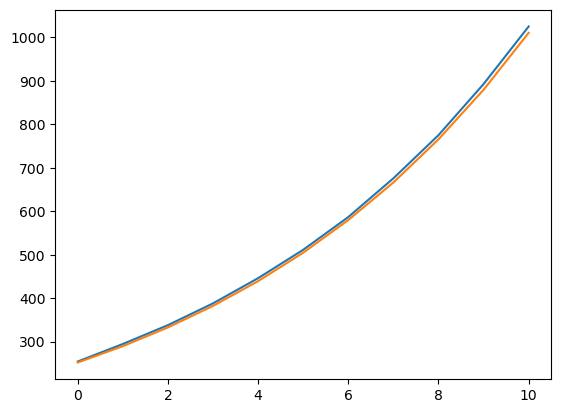

In [81]:
plt.plot(Y_Test, label = 'Real Test')
plt.plot(Yhat_Test, label = 'Predicted Test')
plt.show()